In [1]:
# Bagged Decision Trees for Classification
import pandas as pd
from sklearn import preprocessing
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
# importing data
data = pd.read_csv('Company_Data.csv')
#filename = 'Company_Data.csv'

In [3]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# Converting categorical data to numeric data & numeric data to categorical data

In [4]:
#Complete dataset
label_encoder = preprocessing.LabelEncoder()

In [5]:
data['ShelveLoc']= label_encoder.fit_transform(data['ShelveLoc']) 

In [6]:
data['Urban']= label_encoder.fit_transform(data['Urban']) 

In [7]:
data['US']= label_encoder.fit_transform(data['US']) 

In [8]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


# Pre-precessing data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int32  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int32  
 10  US           400 non-null    int32  
dtypes: float64(1), int32(3), int64(7)
memory usage: 29.8 KB


In [10]:
data['Sales'].max()

16.27

In [11]:
data['Sales'].min()

0.0

<AxesSubplot:>

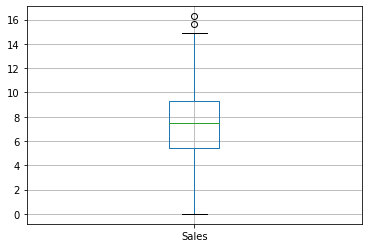

In [12]:
data.boxplot(column= ['Sales'])

C:\Users\uniha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

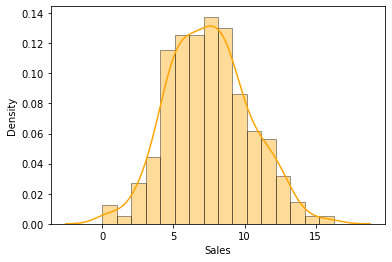

In [13]:
import seaborn as sns
sns.distplot(data['Sales'], color='orange',hist_kws =dict(edgecolor = 'black'))

In [15]:
def change_func(x):
    if x <= 4:
        return "Low"
    elif 4 < x <= 9:
        return "Average"
    else:
        return "High"

data["Sales"] = data["Sales"].apply(lambda x: change_func(x))

In [16]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138,73,11,276,120,0,42,17,1,1
1,High,111,48,16,260,83,1,65,10,1,1
2,High,113,35,10,269,80,2,59,12,1,1
3,Average,117,100,4,466,97,2,55,14,1,1
4,Average,141,64,3,340,128,0,38,13,1,0


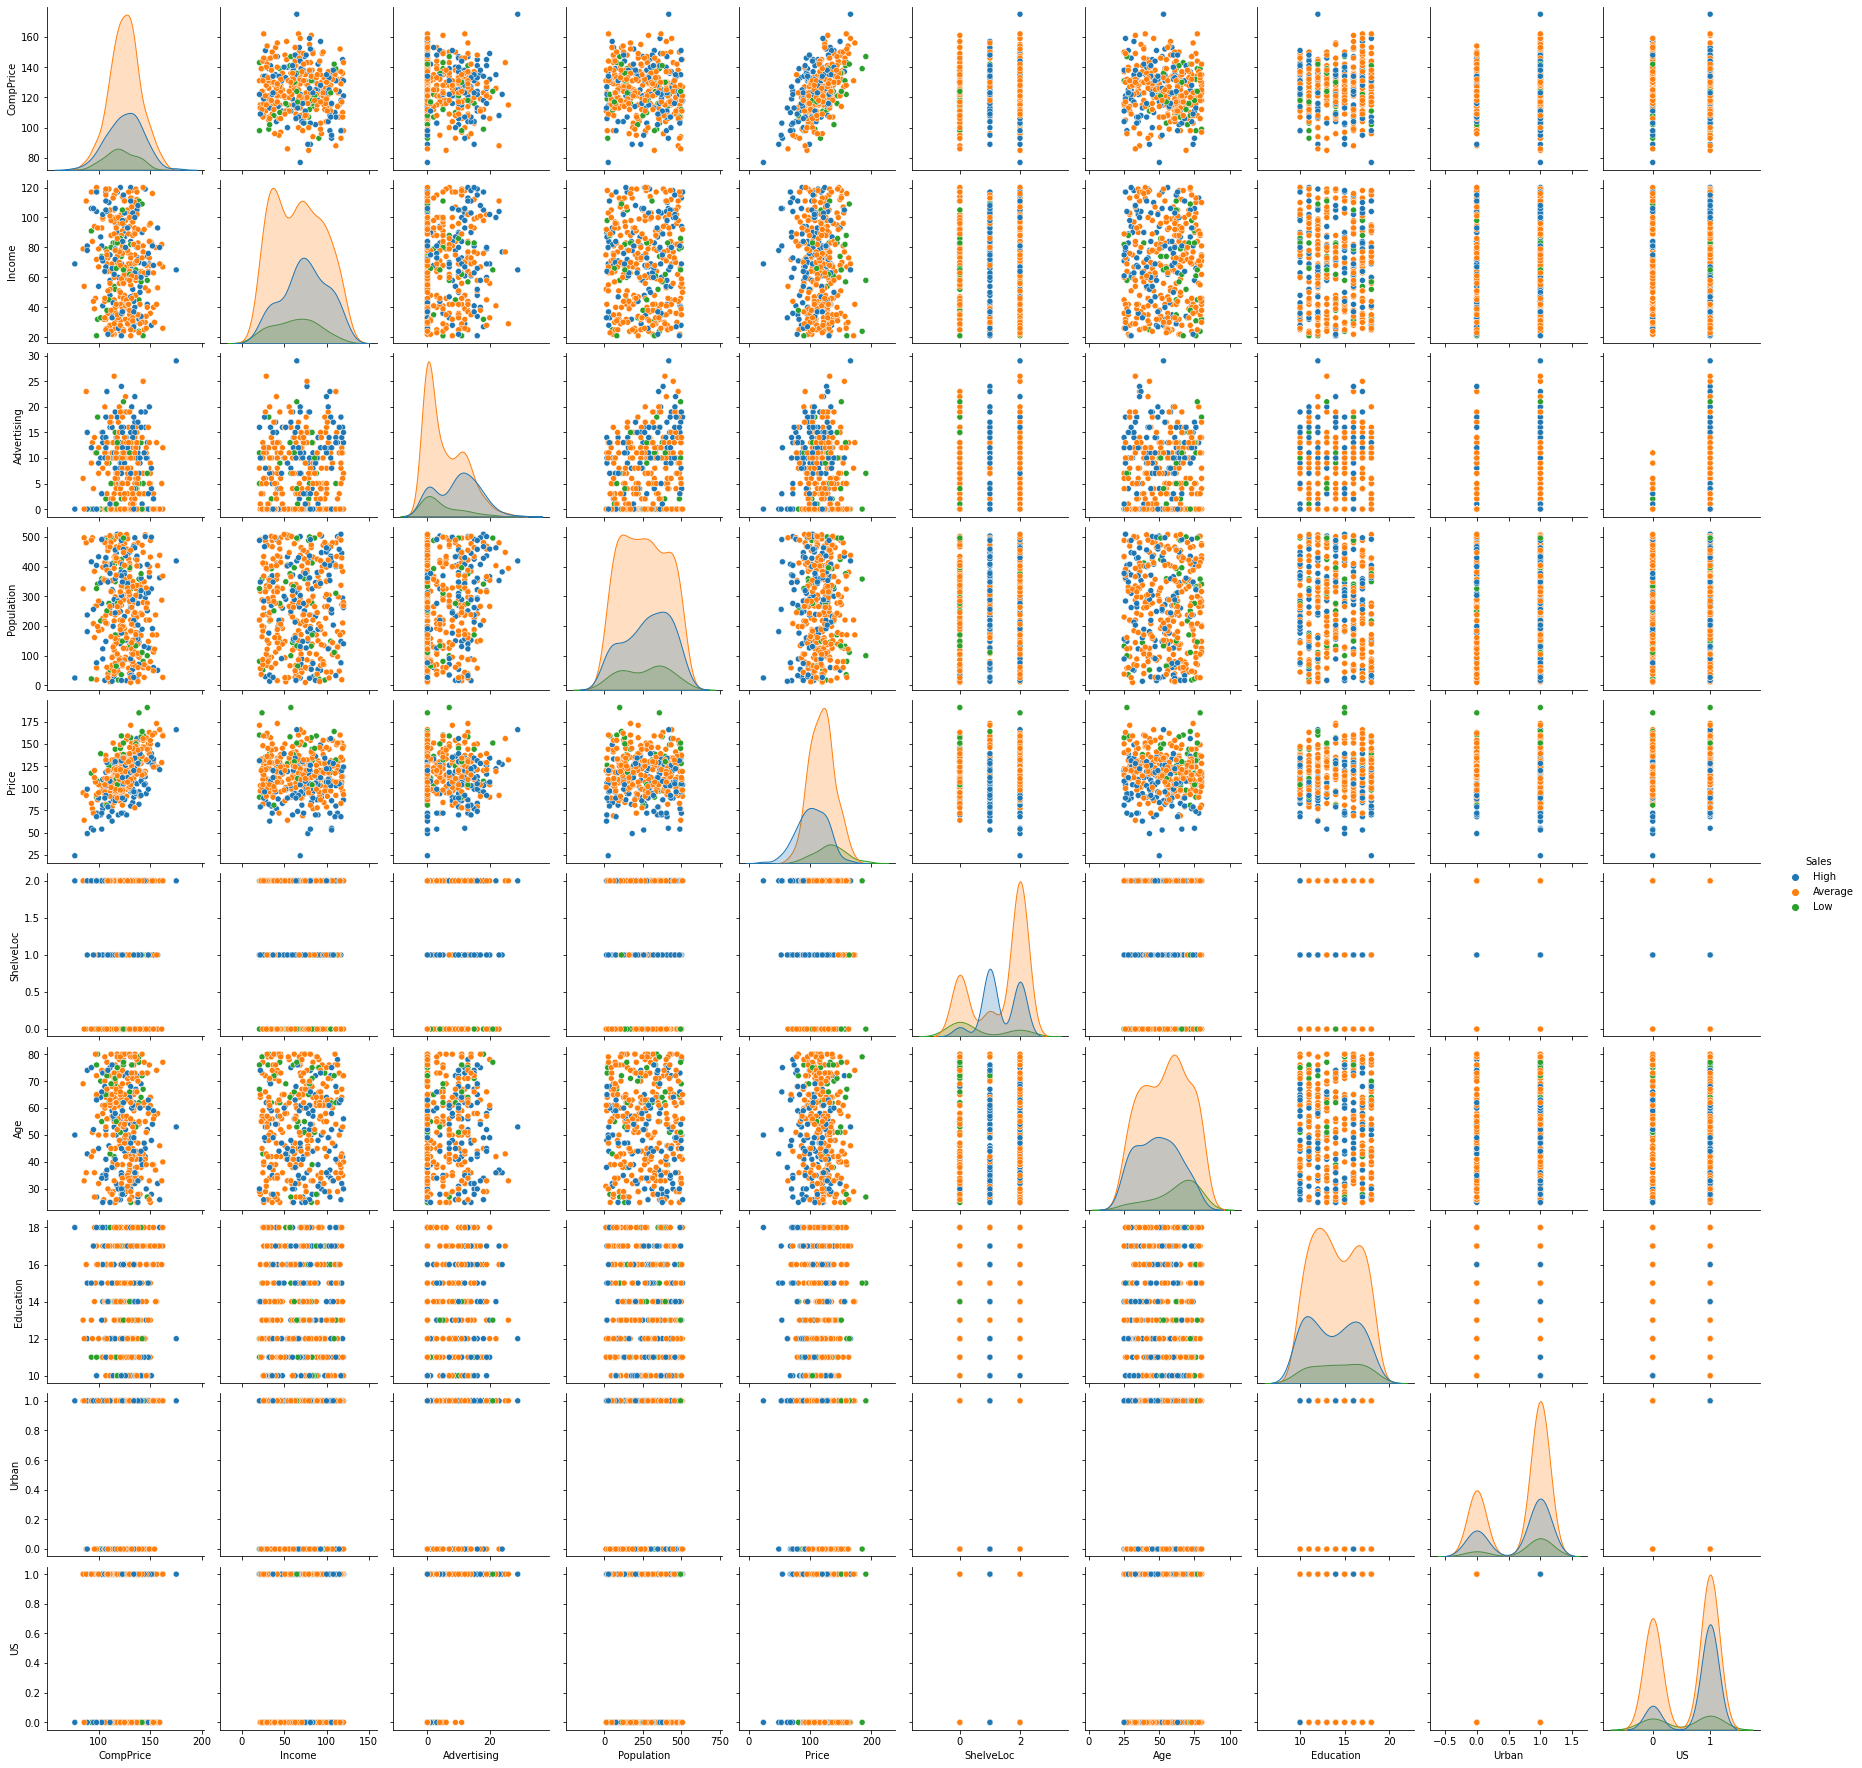

In [17]:
# Pair plot to visualise all the attributes at once
sns.pairplot(data=data, hue = 'Sales')

# Random Forest

In [18]:
array = data.values

In [19]:
X = array[:,1:]
Y = array[:,0]

In [20]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

In [21]:
model = RandomForestClassifier(n_estimators=100, max_features=3).fit(X, Y)
#n_estimators = No. of trees

In [22]:
results = cross_val_score(model, X, Y, cv=kfold)

In [23]:
print((results.mean())*100)

74.25


In [24]:
model.predict(X)

array(['High', 'High', 'High', 'Average', 'Average', 'High', 'Average',
       'High', 'Average', 'Average', 'High', 'High', 'Low', 'High',
       'High', 'Average', 'Average', 'High', 'High', 'Average', 'Average',
       'High', 'Average', 'Average', 'High', 'High', 'Average', 'Average',
       'Low', 'Average', 'High', 'Average', 'Average', 'Average', 'Low',
       'High', 'Average', 'Average', 'Average', 'Low', 'Low', 'Average',
       'High', 'Average', 'Average', 'Average', 'High', 'Average', 'Low',
       'High', 'Low', 'Average', 'Average', 'Average', 'Average',
       'Average', 'High', 'Low', 'Average', 'Average', 'Average',
       'Average', 'Low', 'Average', 'Average', 'Average', 'Average',
       'High', 'High', 'Average', 'High', 'Average', 'Average', 'High',
       'Average', 'Average', 'High', 'Average', 'Average', 'High',
       'Average', 'Average', 'High', 'Average', 'Low', 'Average',
       'Average', 'High', 'Average', 'Average', 'Average', 'Average',
       'Averag

In [25]:
model.feature_importances_

array([0.12062692, 0.11358638, 0.10497138, 0.11079383, 0.21147095,
       0.1214999 , 0.11148291, 0.07169115, 0.01587427, 0.01800231])

In [26]:
df=data[data.columns.difference(['Sales'])]
listed=list(df.columns)
listed

['Advertising',
 'Age',
 'CompPrice',
 'Education',
 'Income',
 'Population',
 'Price',
 'ShelveLoc',
 'US',
 'Urban']

In [27]:
features = pd.Series(model.feature_importances_,index=listed).sort_values(ascending=False)

No handles with labels found to put in legend.


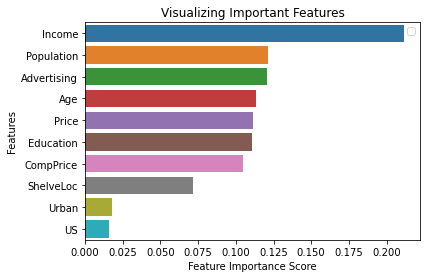

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=features, y=features.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()